In [67]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

from collections import defaultdict

# Data Preparation

In [87]:
df = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/echo_no_outlier.csv')
df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo,duration,bit_rate
0,144,0.909011,0.443643,0.641997,0.924092,0.267669,0.089659,0.788251,128.537,82,256000
1,145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,0.650452,120.790,326,256000
2,146,0.532019,0.417681,0.476422,0.402500,0.172105,0.035361,0.682397,135.468,354,256000
3,147,0.778410,0.706681,0.866116,0.806703,0.104650,0.065083,0.917613,120.218,232,256000
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,0.034018,90.241,405,256000


In [88]:
genre = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/labels_genre_top.csv')
df = df.merge(genre, on='track_id')
df.set_index('track_id', inplace=True)
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo,duration,bit_rate,genre_top
track_id,,,,,,,,,,,
144,0.909011,0.443643,0.641997,0.924092,0.267669,0.089659,0.788251,128.537,82,256000,Jazz
145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,0.650452,120.790,326,256000,Jazz
146,0.532019,0.417681,0.476422,0.402500,0.172105,0.035361,0.682397,135.468,354,256000,Jazz
147,0.778410,0.706681,0.866116,0.806703,0.104650,0.065083,0.917613,120.218,232,256000,Jazz
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,0.034018,90.241,405,256000,Rock


In [77]:
# encoding labels
le = preprocessing.LabelEncoder()
df['genre_top'] = le.fit_transform(df['genre_top'])
print('legend:\n0: Jazz\n1: Rock')
df.genre_top.value_counts()

legend:
0: Jazz
1: Rock


1    3891
0     241
Name: genre_top, dtype: int64

In [89]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo,duration,bit_rate,genre_top
track_id,,,,,,,,,,,
144,0.909011,0.443643,0.641997,0.924092,0.267669,0.089659,0.788251,128.537,82,256000,Jazz
145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,0.650452,120.790,326,256000,Jazz
146,0.532019,0.417681,0.476422,0.402500,0.172105,0.035361,0.682397,135.468,354,256000,Jazz
147,0.778410,0.706681,0.866116,0.806703,0.104650,0.065083,0.917613,120.218,232,256000,Jazz
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,0.034018,90.241,405,256000,Rock


# Data Partitioning

In [60]:
attributes = [col for col in df.columns if col != 'genre_top']

train, test = train_test_split(df, test_size=.33, random_state=42)

X_test = df[attributes]
y_test = df['genre_top']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [90]:
# encoding labels
le = preprocessing.LabelEncoder()
y_test_enc = ~le.fit_transform(test['genre_top']).astype('bool')
y_test_enc

array([False, False, False, ..., False, False, False])

In [61]:
df['genre_top'].value_counts()

Rock    3891
Jazz     241
Name: genre_top, dtype: int64

# RIPPER

https://github.com/imoscovitz/wittgenstein

In [62]:
import wittgenstein as lw

In [63]:
clf = lw.RIPPER(random_state=42)
clf.fit(train, class_feat='genre_top', pos_class='Jazz')

In [64]:
clf.out_model()

[[energy=0.0-0.24 ^ duration=311-405 ^ liveness=0.11-0.11] V
[energy=0.0-0.24 ^ danceability=0.3-0.34 ^ tempo=29.09-85.47] V
[energy=0.0-0.24 ^ instrumentalness=0.88-0.91] V
[tempo=29.09-85.47 ^ acousticness=0.97-1.0 ^ energy=0.0-0.24 ^ bit_rate=256000-320000] V
[energy=0.0-0.24 ^ instrumentalness=0.91-0.93 ^ duration=311-405] V
[duration=405-3033 ^ speechiness=0.11-0.96 ^ instrumentalness=0.25-0.63] V
[tempo=29.09-85.47 ^ speechiness=0.11-0.96 ^ duration=311-405] V
[duration=405-3033 ^ energy=0.24-0.39 ^ bit_rate=-1-160000] V
[energy=0.0-0.24 ^ bit_rate=256000-320000 ^ duration=104-134 ^ instrumentalness=0.95-0.99] V
[tempo=29.09-85.47 ^ bit_rate=-1-160000 ^ energy=0.24-0.39] V
[duration=405-3033 ^ energy=0.39-0.49 ^ valence=0.3-0.39] V
[speechiness=0.11-0.96 ^ bit_rate=160000-192000 ^ danceability=0.38-0.43] V
[energy=0.49-0.58 ^ tempo=170.88-250.06 ^ duration=311-405]]


In [92]:
y_predicted = clf.predict(test)

print(classification_report(y_test_enc, y_predicted))

              precision    recall  f1-score   support

       False       0.95      0.98      0.96      1288
        True       0.33      0.20      0.25        76

    accuracy                           0.93      1364
   macro avg       0.64      0.59      0.61      1364
weighted avg       0.92      0.93      0.92      1364



In [95]:
clf.out_model()

[[energy=0.0-0.24 ^ duration=311-405 ^ liveness=0.11-0.11] V
[energy=0.0-0.24 ^ danceability=0.3-0.34 ^ tempo=29.09-85.47] V
[energy=0.0-0.24 ^ instrumentalness=0.88-0.91] V
[tempo=29.09-85.47 ^ acousticness=0.97-1.0 ^ energy=0.0-0.24 ^ bit_rate=256000-320000] V
[energy=0.0-0.24 ^ instrumentalness=0.91-0.93 ^ duration=311-405] V
[duration=405-3033 ^ speechiness=0.11-0.96 ^ instrumentalness=0.25-0.63] V
[tempo=29.09-85.47 ^ speechiness=0.11-0.96 ^ duration=311-405] V
[duration=405-3033 ^ energy=0.24-0.39 ^ bit_rate=-1-160000] V
[energy=0.0-0.24 ^ bit_rate=256000-320000 ^ duration=104-134 ^ instrumentalness=0.95-0.99] V
[tempo=29.09-85.47 ^ bit_rate=-1-160000 ^ energy=0.24-0.39] V
[duration=405-3033 ^ energy=0.39-0.49 ^ valence=0.3-0.39] V
[speechiness=0.11-0.96 ^ bit_rate=160000-192000 ^ danceability=0.38-0.43] V
[energy=0.49-0.58 ^ tempo=170.88-250.06 ^ duration=311-405]]


base.py: .predict_proba: RuntimeWarning: 
Some examples lacked any rule with sufficient sample size to predict_proba: [1891, 1895, 2654]
 Consider running recalibrate_proba with smaller param min_samples, or set require_min_samples=False



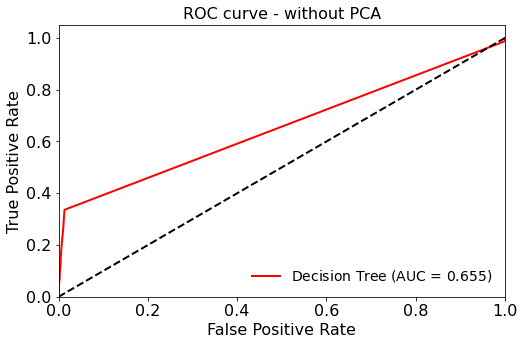

In [97]:
plt.figure(figsize=(8,5))

# y_score0 --> scores of decision tree without PCA
# fpr0, tpr0 ---> false positive and true positive of decision tree without PCA
y_score0 = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score0[:, 1], pos_label='Jazz')

# roc_auc0 --> ROC/AUC of decision tree without PCA
roc_auc0 = auc(fpr0, tpr0)

plt.plot(fpr0, tpr0, color='red', lw=2, label='Decision Tree$\;$(AUC = %.3f)' % roc_auc0)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve - without PCA', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()